# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/kaggle/input/nissan-all-models-price-prediction-dataset/nissan-dataset.csv')
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


# EDA/Data Cleaning

In [5]:
df.isna().sum()

id               0
full_name      843
age            846
gender         856
model          870
color          861
performance    857
km             859
condition      849
price          841
dtype: int64

There are lots of null values in the dataset. I'll first fill the numeric colums by their mean/median/mode but it depends on the column values ranges/frequency. There are other menthods to fill null values like using predicting using ML models.

## Filling null values in age, performance, and km column

<Axes: title={'center': 'Age Column'}, ylabel='Frequency'>

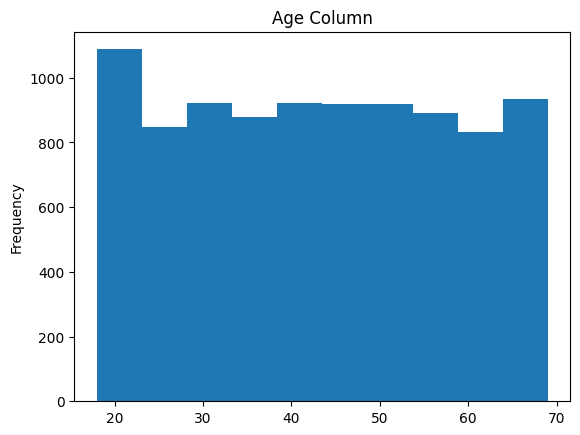

In [6]:
df['age'].plot(kind='hist', title='Age Column')

In [7]:
df['age'].fillna(df['age'].mean(), inplace=True)

<Axes: title={'center': 'Performance Column'}, ylabel='Frequency'>

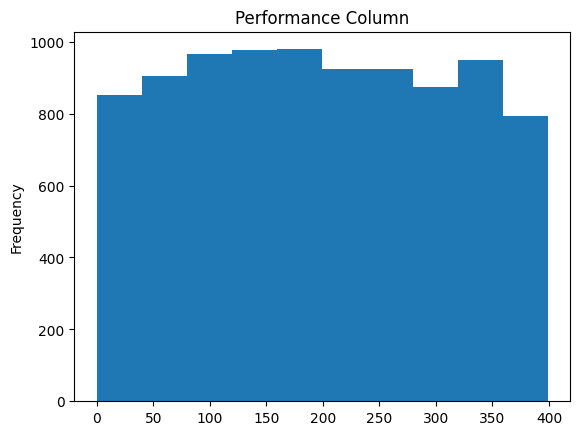

In [8]:
df['performance'].plot(kind='hist', title='Performance Column')

In [9]:
df['performance'].fillna(df['performance'].mean(), inplace=True)

<Axes: title={'center': 'km Column'}, ylabel='Frequency'>

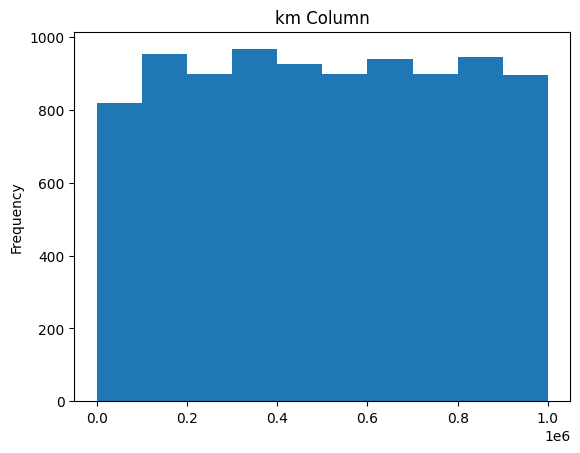

In [10]:
df['km'].plot(kind='hist', title='km Column')

In [11]:
df['km'].fillna(df['km'].mean(), inplace=True)

## Why filled with mean()?

Here, I used the mean imputation to fill null values as you can see the histogram. The mean lies nearest to all the values.

In [12]:
df.isna().sum()

id               0
full_name      843
age              0
gender         856
model          870
color          861
performance      0
km               0
condition      849
price          841
dtype: int64

## Dropping rest of null values

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64

In [15]:
df.shape

(9090, 10)

## Dropping irrelevent columns

In [16]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'model', 'color', 'performance',
       'km', 'condition', 'price'],
      dtype='object')

In [17]:
df.drop(['id', 'full_name'], axis=1, inplace=True)

In [18]:
df.shape

(9090, 8)

In [19]:
df.head()

,age,gender,model,color,performance,km,condition,price
0,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


## Dummy Encoding

In [20]:
print("Unique Values in color column: ", df['color'].nunique())
print("Unique Values in gender column: ", df['gender'].nunique())
print("Unique Values in model column: ", df['model'].nunique())
print("Unique Values in condition column: ", df['condition'].nunique())

Unique Values in color column:  23
Unique Values in gender column:  8
Unique Values in model column:  70
Unique Values in condition column:  6


In [21]:
df['gender'].unique()

array(['Male', 'Polygender', 'Genderqueer', 'Female', 'Genderfluid',
       'Agender', 'Bigender', 'Non-binary'], dtype=object)

In [22]:
encoded_df = pd.get_dummies(df, columns=['color', 'gender', 'model', 'condition'])
encoded_df

,age,performance,km,price,color_Aquamarine,color_Black,color_Blue,color_Crimson,color_Fuscia,color_Goldenrod,...,model_Versa,model_Wingroad,model_X-Trail,model_Xterra,condition_bad,condition_good,condition_new,condition_old,condition_very bad,condition_very good
0,42.0,299.0,509305.0,40394.91,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,54.0,109.0,965853.0,8687.90,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,37.0,52.0,380906.0,44705.31,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,55.0,336.0,573171.0,32889.88,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,21.0,2.0,809470.0,6949.22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,63.0,339.0,715741.0,19710.18,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9996,45.0,81.0,786768.0,47797.76,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9997,27.0,130.0,99170.0,35058.91,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9998,68.0,215.0,640764.0,21176.71,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
print(encoded_df.columns)

Index(['age', 'performance', 'km', 'price', 'color_Aquamarine', 'color_Black',
       'color_Blue', 'color_Crimson', 'color_Fuscia', 'color_Goldenrod',
       ...
       'model_Versa', 'model_Wingroad', 'model_X-Trail', 'model_Xterra',
       'condition_bad', 'condition_good', 'condition_new', 'condition_old',
       'condition_very bad', 'condition_very good'],
      dtype='object', length=111)


# Split train, test and validation dataset

In [24]:
# Split data into features and labels
X = encoded_df.drop('price', axis=1)
y = encoded_df['price']

In [25]:
# First split: train + validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7272, 110)
Test set shape: (1818, 110)


# Models

## Linear Regression

In [27]:
linear_regression_model = LinearRegression()

In [28]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
linear_regression_predictions = linear_regression_model.predict(X_test)

In [30]:
# Calculate metrics for Linear Regression
mse_linear = mean_squared_error(y_test, linear_regression_predictions)
r2_linear = r2_score(y_test, linear_regression_predictions)

In [31]:
print("Linear Regression - Mean Squared Error: {:.2f}".format(mse_linear))
print("Linear Regression - R^2 Score: {:.2f}".format(r2_linear))

Linear Regression - Mean Squared Error: 193932689.82
Linear Regression - R^2 Score: -0.03


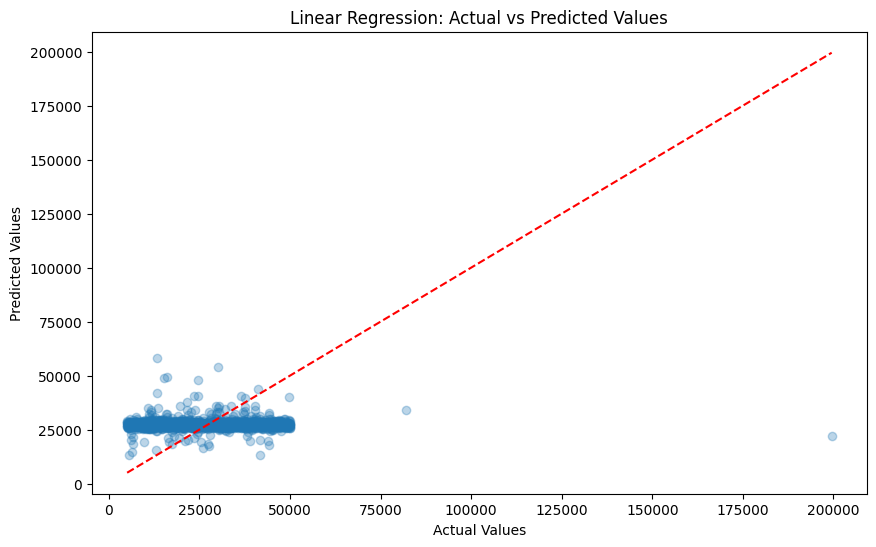

In [32]:
# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

## Decision Tree

In [33]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
# Generate predictions for Decision Tree Regressor
decision_tree_predictions = decision_tree_regressor.predict(X_test)

In [35]:
# Calculate metrics for Decision Tree Regressor
mse_tree = mean_squared_error(y_test, decision_tree_predictions)
r2_tree = r2_score(y_test, decision_tree_predictions)

In [36]:
print("Decision Tree Regressor - Mean Squared Error: {:.2f}".format(mse_tree))
print("Decision Tree Regressor - R^2 Score: {:.2f}".format(r2_tree))

Decision Tree Regressor - Mean Squared Error: 365265049.06
Decision Tree Regressor - R^2 Score: -0.93


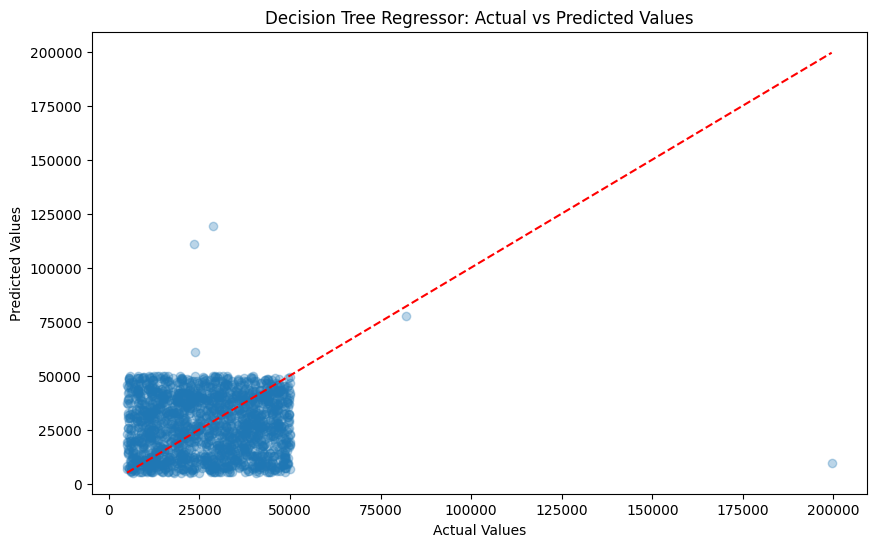

In [37]:
# Plot actual vs. predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted Values')
plt.show()

## Random Forest

In [38]:
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
# Generate predictions for Random Forest Regressor
random_forest_predictions = random_forest_regressor.predict(X_test)

In [40]:
# Calculate metrics for Random Forest Regressor
mse_forest = mean_squared_error(y_test, random_forest_predictions)
r2_forest = r2_score(y_test, random_forest_predictions)

In [41]:
print("Random Forest Regressor - Mean Squared Error: {:.2f}".format(mse_forest))
print("Random Forest Regressor - R^2 Score: {:.2f}".format(r2_forest))

Random Forest Regressor - Mean Squared Error: 194974107.47
Random Forest Regressor - R^2 Score: -0.03


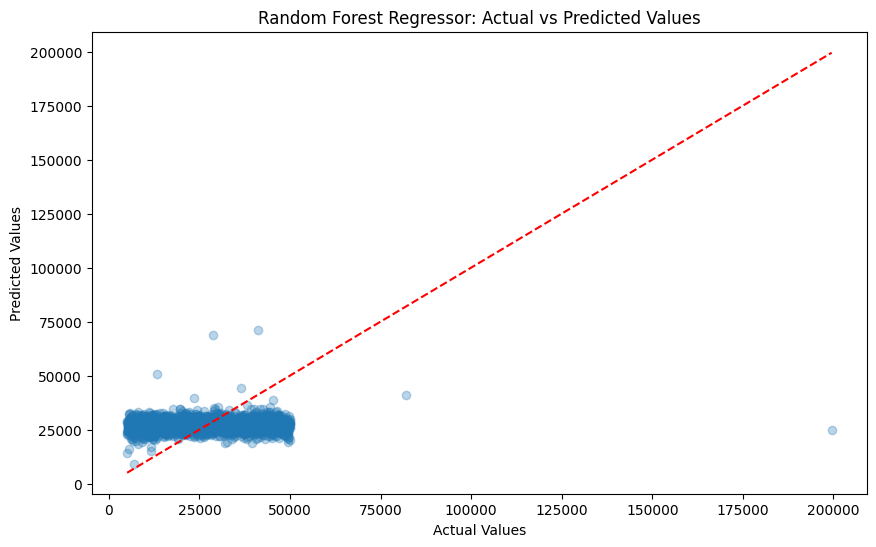

In [42]:
# Plot actual vs. predicted values for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted Values')
plt.show()

## Going with GridSearchCV

In [43]:
# Define parameter grids
param_grid_lr = {}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3]
}
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [44]:
# Initialize models
models = {
    'Linear Regression': (LinearRegression(), param_grid_lr),
    'Decision Tree Regressor': (DecisionTreeRegressor(), param_grid_dt),
    'Random Forest Regressor': (RandomForestRegressor(), param_grid_rf),
    'K-Neighbors Regressor': (KNeighborsRegressor(), param_grid_knn),
    'Support Vector Regressor': (SVR(), param_grid_svr),
    'Gradient Boosting Regressor': (GradientBoostingRegressor(), param_grid_gb)
}

### Train the models

In [ ]:
# Perform GridSearchCV and store the best model
best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Best CV Score: {grid_search.best_score_:.2f}")

Linear Regression - Best Parameters: {}
Linear Regression - Best CV Score: -0.03
Decision Tree Regressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Decision Tree Regressor - Best CV Score: -0.04
Random Forest Regressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}
Random Forest Regressor - Best CV Score: -0.01
K-Neighbors Regressor - Best Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
K-Neighbors Regressor - Best CV Score: -0.10


### Evaluate the models

In [ ]:
# Evaluate the best model on the test set
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} - Test Mean Squared Error: {mse:.2f}")
    print(f"{model_name} - Test R^2 Score: {r2:.2f}")
    plot_predictions(y_test, predictions, model_name)

In [ ]:
# Plot actual vs. predicted values
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.3)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Actual vs Predicted Values')
    plt.show()

In [ ]:
# Evaluate and plot for the best models
for model_name, best_model in best_models.items():
    evaluate_model(best_model, X_test, y_test, model_name)